## 聚类分析--处理无类标数据
### K-means聚类分析

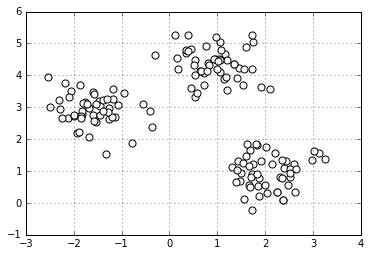

In [1]:
%matplotlib inline

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', s=50)
plt.grid()
plt.show()

In [2]:
# sklearn KMeans算法
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
           init='random', # 修改init为k-means++，即可以使用K-means++算法
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km = km.fit_predict(X)

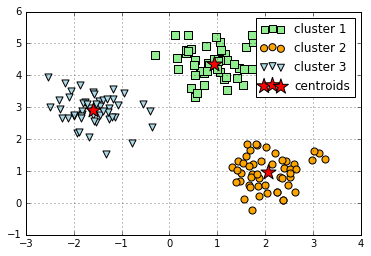

In [3]:
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, 
            c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, 
            c='orange', marker='o', label='cluster 2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, 
            c='lightblue', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=250, c='red', marker='*', label='centroids')
plt.legend()
plt.grid()
plt.show()

In [4]:
# 误差平方和
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


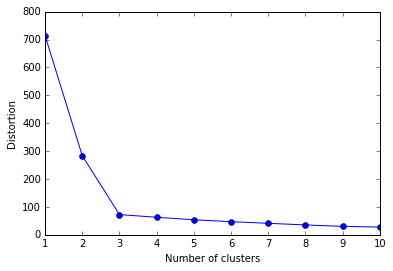

In [5]:
# 利用肘方法寻找最适合的K值
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
# k=3时图案呈现了肘形，对于此数据集来说k=3是个不错的选择

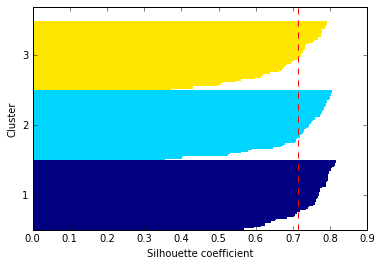

In [6]:
# 轮廓图
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)


import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower,  y_ax_upper = 0,  0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

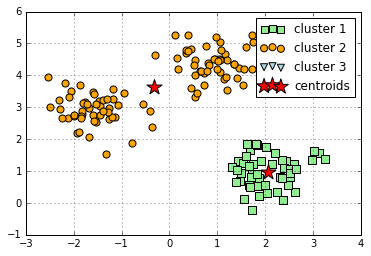

In [7]:
# 为了和上面的做对比，我们这里设置2个中心点的k-means的效果
km = KMeans(n_clusters=2, 
           init='random',  
           n_init=10, 
           max_iter=300, 
           tol=1e-04, 
           random_state=0)
y_km = km.fit_predict(X)

# Plot...
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red', marker='*', label='centroids')
plt.legend()
plt.grid()
plt.show()

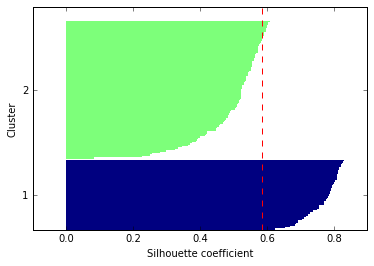

In [8]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
# 可以看出轮廓具有明显不同的长度和宽度，证明该聚类并非最优结果。

### 层次聚类
单连接：计算每一对簇中最相似的两个样本的距离，并合并距离最近的两个样本所属簇。   
全连接：通过比较找到分布于两个簇中最不相似的样本（距离最远的样本），进而完成簇的合并。    

In [9]:
# 随机生成一批数据
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [10]:
# 计算距离矩阵
# pdist得到稠密矩阵（上三角）， squareform生成样本间距离的对称矩阵。
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [11]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean')
    Performs hierarchical/agglomerative clustering on the condensed
    distance matrix y.
    
    y must be a :math:`{n \choose 2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    An :math:`(n-1)` by 4  matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of original
    observations in the newly formed cluster.
    
    The following linkage methods are used to compute the distance
  

In [12]:
# 计算关联矩阵
# 错误的方法
row_clusters = linkage(row_dist, method='complete', metric='euclidean')
row_clusters

array([[  0.        ,   4.        ,   6.52197264,   2.        ],
       [  1.        ,   2.        ,   6.72960262,   2.        ],
       [  3.        ,   5.        ,   8.53924727,   3.        ],
       [  6.        ,   7.        ,  12.44482356,   5.        ]])

In [13]:
# 正确的方法1，传递稠密矩阵
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete', metric='euclidean')

In [14]:
# 方式2，传递原始数据矩阵
row_clusters = linkage(df.values, metric='euclidean', method='complete')
row_clusters

array([[ 0.        ,  4.        ,  3.83539555,  2.        ],
       [ 1.        ,  2.        ,  4.34707339,  2.        ],
       [ 3.        ,  5.        ,  5.89988504,  3.        ],
       [ 6.        ,  7.        ,  8.31659367,  5.        ]])

In [15]:
# 关联矩阵包含多行，每行代表一次簇的合并。
# 第一列和第二列分别表示每个簇中最不相似（距离最远）的样本，第三列为这些样本的距离，最后一列为每个簇中的样本数量。
pd.DataFrame(row_clusters,
            columns = ['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
            index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


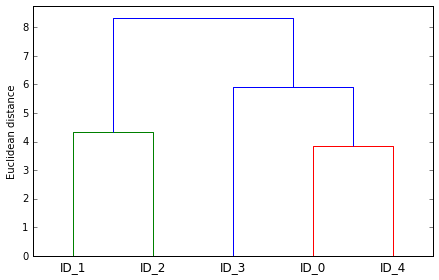

In [16]:
# 使用树状图对聚类结果进行可视化
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters, labels=labels,
                       # color_threshold=np.inf
                      )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()
# 由图可见，首先是ID_0和ID_4合并，接下来是ID_1和ID_2合并，也就是基于欧几里得距离矩阵，选择最不相似的样本进行合并。

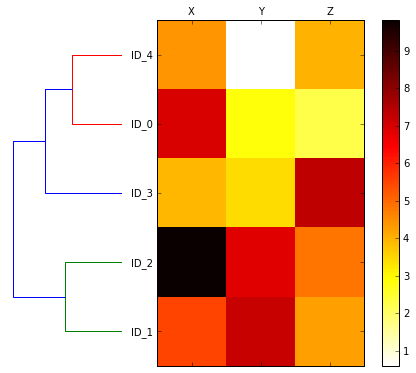

In [17]:
# 将树状图和热度图合并显示

fig = plt.figure(figsize=(8, 8), facecolor='white')
# 通过add_axes属性来设定x、y轴位置，以及树状图的宽度和高度
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
# 沿逆时针将树状图旋转90度
row_dendr = dendrogram(row_clusters, orientation='left')

# 获取数据
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

# 绘制热点图
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

# 删除坐标轴标记，并将坐标轴刻度隐藏。
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()
# 热点图的行反映了树状图中样本聚类的情况，用颜色代表的各样本及其特征为我们提供了关于数据集的一个良好的概括。

In [18]:
# 使用sklearn进行基于凝聚的层次聚类
from sklearn.cluster import AgglomerativeClustering
# n_clusters设置簇的数量，使用和上面一样的完全连接方法，基于欧几里得距离矩阵，将样本划分为两个簇。
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' %labels)
# 可以看到将ID_0、ID_3、ID_4分到第一个簇，ID_1、ID_2划分到第二个簇，和我们通过树状图得到的结果一致。

Cluster labels: [0 1 1 0 0]


### 使用DBSCAN划分高密度区域
基于空间密度的聚类算法(Density-based Spatial Clustering of Applications with Noise, DBSCAN)

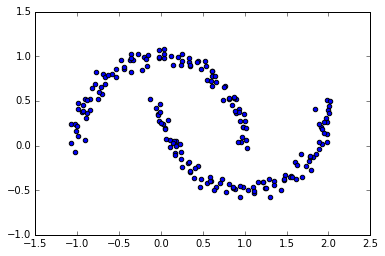

In [19]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

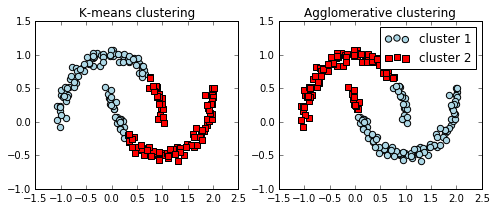

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# k-means
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0, 0], X[y_km==0, 1], c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1, 0], X[y_km==1, 1], c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

# linkage
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0, 0], X[y_ac==0, 1], c='lightblue', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1, 0], X[y_ac==1, 1], c='red', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.show()
# 2种不同的聚类算法都不能很好的把这种复杂形状的数据分离开

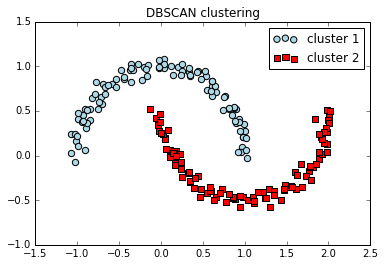

In [21]:
# DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db==0, 0], X[y_db==0, 1], c='lightblue', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1, 0], X[y_db==1, 1], c='red', marker='s', s=40, label='cluster 2')
plt.title('DBSCAN clustering')
plt.legend()
plt.show()